# Prueba 3 Minería de datos

## Profesor Daniel Montero

## Integrantes

- ### Francisco Galdames
- ### Jorge Parra
- ### Gabriel Soto

Fecha de entrega: Sabado 29\-06\-2024



In [82]:
import pandas

from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.decomposition import PCA
import numpy
from sklearn.metrics import ConfusionMatrixDisplay as plot_confusion_matrix

import sklearn.datasets

import seaborn
import missingno

pandas.options.mode.chained_assignment = None


In [83]:
# Importamos csv
df = pandas.read_csv("./weatherAUS.csv")

In [84]:
# Informacion acerca del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [85]:
# Estadisticas descriptivas del dataset
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


# Manejando datos faltantes
## Visualizacion de los datos faltantes

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64


<Axes: >

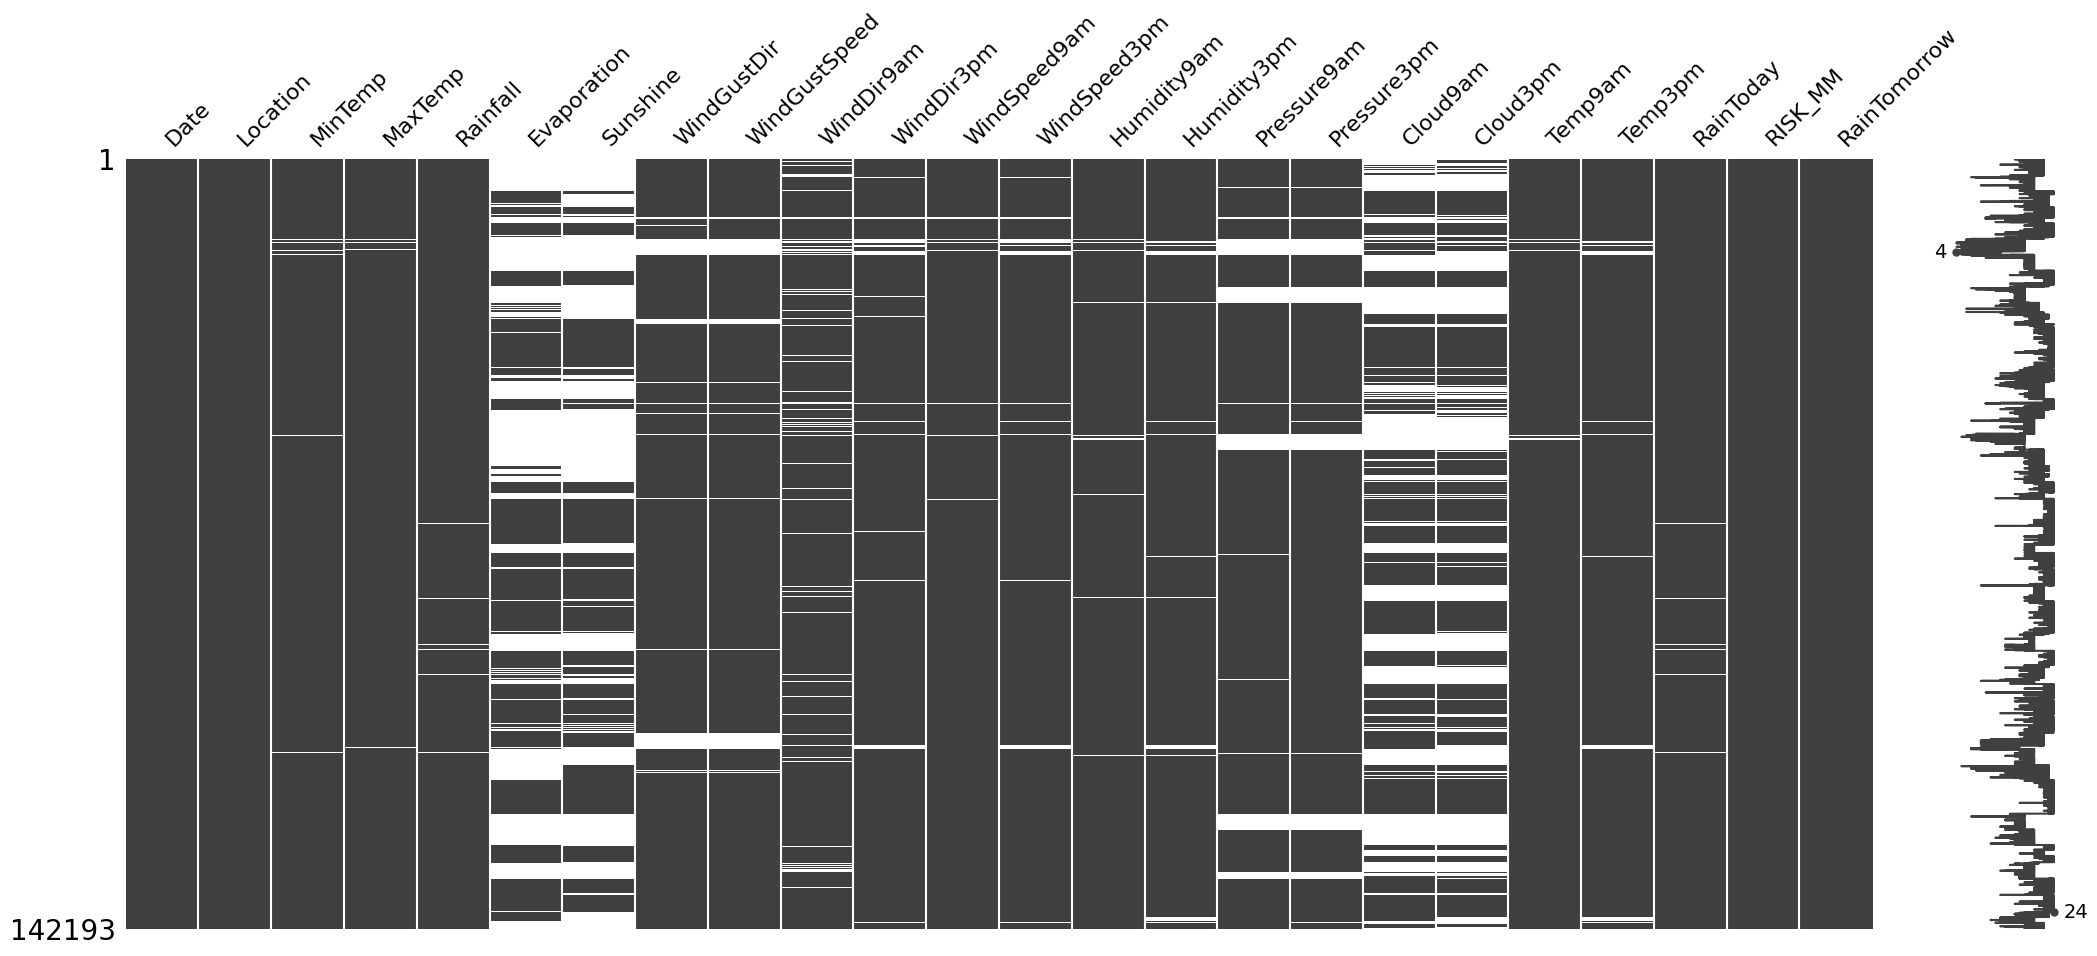

In [86]:
# Obtenemos el numero de valores faltantes por cada columna
print(df.isna().sum())
# Visualizamos los valores faltantes por cada columna
missingno.matrix(df)

## Limpieza e imputación de los datos

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64


<Axes: >

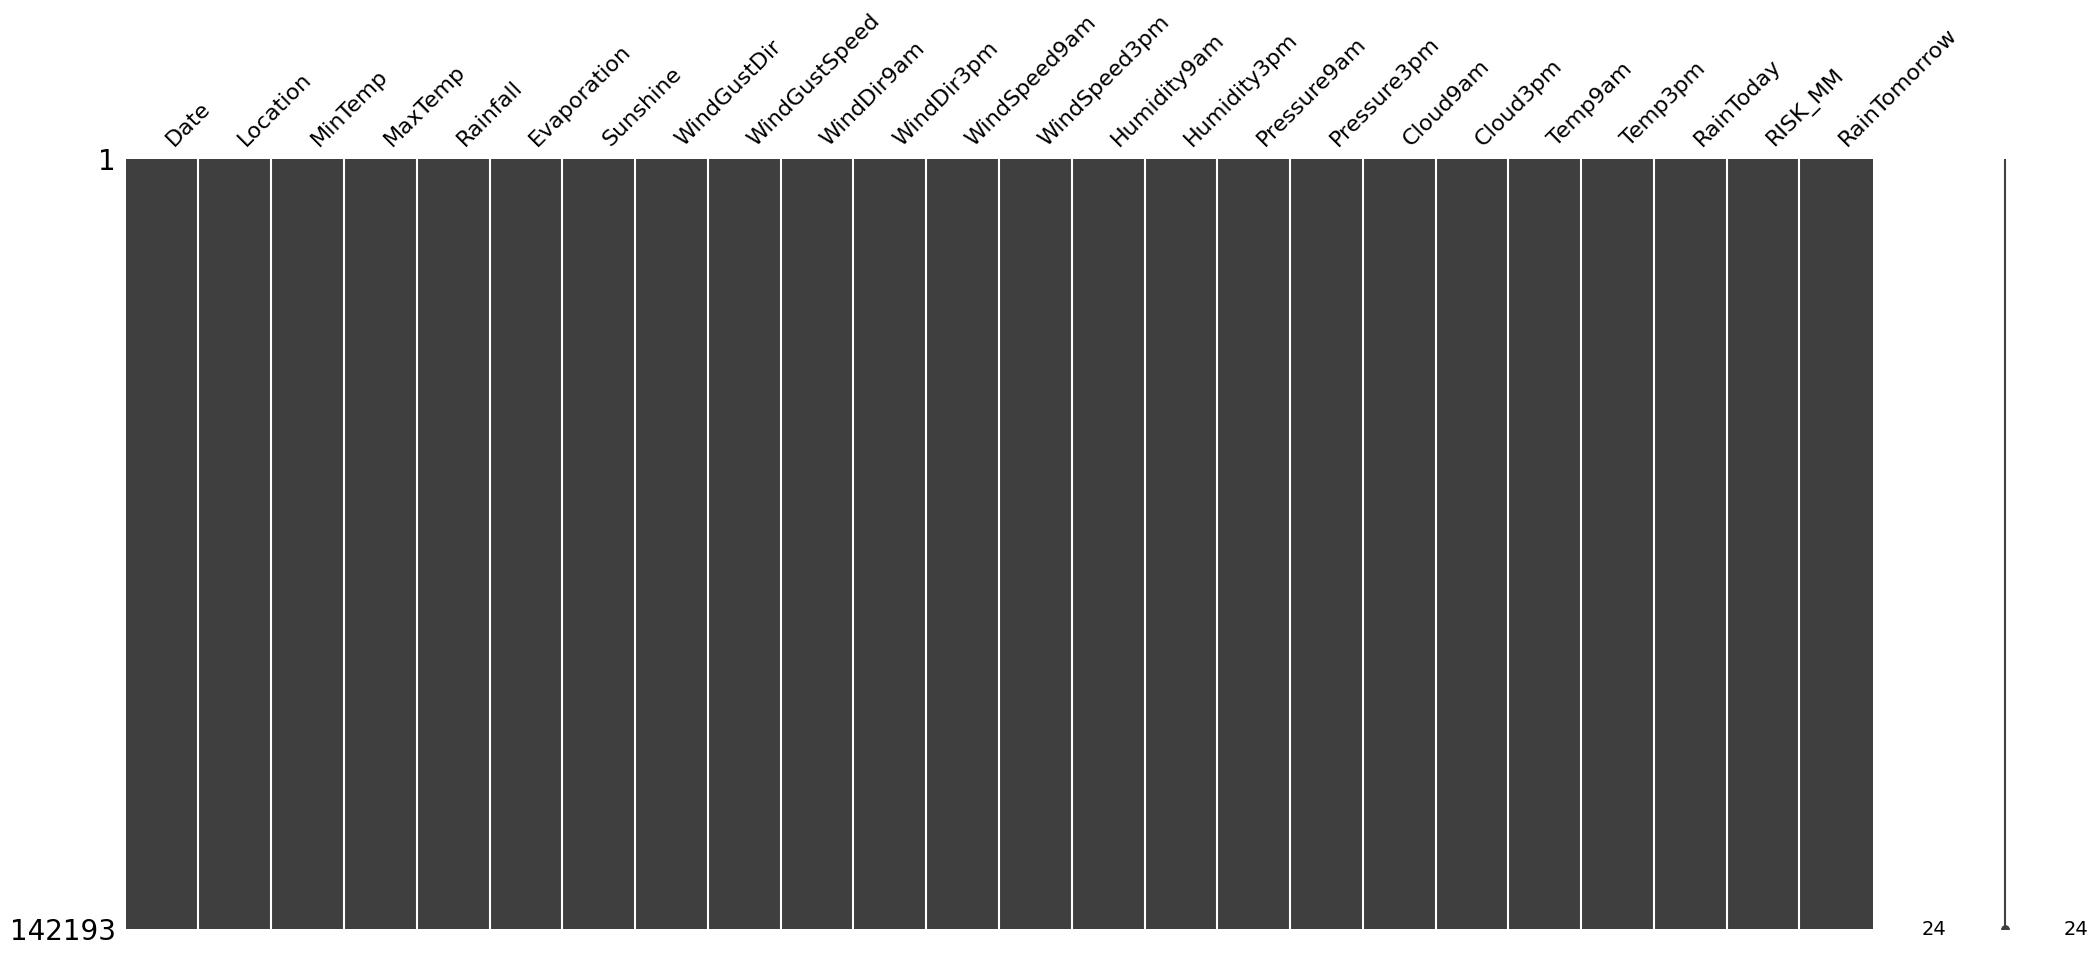

In [87]:
# Duplicamos el dataframe para no alterar el original
dfNoNulos = df.copy()

# Conversion de columna date a type Datetime
dfNoNulos.Date = pandas.to_datetime(dfNoNulos.Date)

# Ordenamos las filas por fecha y ciudad
dfNoNulos:pandas.DataFrame = dfNoNulos.sort_values(by=[dfNoNulos.Date.name, dfNoNulos.Location.name])

# Llenamos los valores numericos con el metodo de interpolacion linear
columnas_numericas = dfNoNulos.select_dtypes(include="number").columns

for columna in columnas_numericas:
    dfNoNulos[columna] = dfNoNulos[columna].interpolate(method="slinear", limit_direction="both")

# Llenamos los valores no numericos con forward fill
dfNoNulos = dfNoNulos.ffill()

## Muestra de columnas
print(dfNoNulos.isna().sum())
missingno.matrix(dfNoNulos)

In [88]:
# Inspeccion del nuevo dataframe
dfNoNulos.head(250)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
44351,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.000000,SW,...,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,No,3.6,Yes
44352,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.000000,E,...,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,3.6,Yes
44353,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.000000,N,...,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,Yes,39.8,Yes
44354,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.000000,WNW,...,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,Yes,2.8,Yes
44355,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.000000,SSE,...,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29573,2008-04-17,Sydney,14.9,19.7,4.6,1.4,0.8,WNW,38.022472,SSW,...,72.0,1025.1,1023.4,7.0,7.0,16.4,19.4,Yes,6.4,Yes
44520,2008-04-18,Canberra,7.9,19.7,0.0,3.2,8.3,ESE,48.000000,SSE,...,43.0,1027.3,1024.1,3.0,6.0,14.0,19.1,No,0.0,No
29574,2008-04-18,Sydney,15.3,20.0,6.4,3.2,0.3,ESE,38.035751,W,...,75.0,1025.4,1023.7,8.0,7.0,16.4,19.6,Yes,5.0,Yes
44521,2008-04-19,Canberra,8.4,16.1,0.0,3.0,4.9,SE,35.000000,SE,...,51.0,1029.5,1027.4,6.0,7.0,13.6,15.2,No,0.0,No


In [89]:
# Dropeo y transformacion de columnas
# Transformamos columna Date a Month
dfNoNulos['Date'] = pandas.to_datetime(dfNoNulos['Date'])
dfNoNulos.insert(0, 'Month', dfNoNulos["Date"].dt.month)

columnas_a_eliminar = [
    "Date",
    "RISK_MM"
]


dfNoNulos = dfNoNulos.drop(columnas_a_eliminar, axis=1)

# Transformamos columnas categoricas a numericas
columnasACategorizar = [
    "Location",
    "WindGustDir",
    "WindDir9am",
    "WindDir3pm",
    "RainToday",
    "RainTomorrow"
]
labelencoder = LabelEncoder()

for columna in columnasACategorizar:
    dfNoNulos[columna] = labelencoder.fit_transform(dfNoNulos[columna])


In [90]:
dfNoNulos.head(250)

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
44351,11,9,8.0,24.3,0.0,3.4,6.3,7,30.000000,12,...,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,0,1
44352,11,9,14.0,26.9,3.6,4.4,9.7,1,39.000000,0,...,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,1,1
44353,11,9,13.7,23.4,3.6,5.8,3.3,7,85.000000,3,...,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,1,1
44354,11,9,13.3,15.5,39.8,7.2,9.1,7,54.000000,14,...,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,1,1
44355,11,9,7.6,16.1,2.8,5.6,10.6,10,50.000000,10,...,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29573,4,37,14.9,19.7,4.6,1.4,0.8,14,38.022472,11,...,91.0,72.0,1025.1,1023.4,7.0,7.0,16.4,19.4,1,1
44520,4,9,7.9,19.7,0.0,3.2,8.3,2,48.000000,10,...,58.0,43.0,1027.3,1024.1,3.0,6.0,14.0,19.1,0,0
29574,4,37,15.3,20.0,6.4,3.2,0.3,2,38.035751,13,...,94.0,75.0,1025.4,1023.7,8.0,7.0,16.4,19.6,1,1
44521,4,9,8.4,16.1,0.0,3.0,4.9,9,35.000000,9,...,69.0,51.0,1029.5,1027.4,6.0,7.0,13.6,15.2,0,0


In [91]:
# Cantidad de datos por Locacion
dfNoNulos['Location'].value_counts()

Location
9     3418
37    3337
31    3193
13    3192
15    3188
7     3161
0     3090
6     3034
39    3033
3     3031
22    3030
17    3028
5     3028
1     3016
2     3011
19    3009
32    3009
20    3007
38    3005
28    3002
35    3000
44    2999
40    2998
33    2996
48    2990
8     2988
10    2988
47    2983
14    2980
42    2976
27    2964
30    2964
24    2955
36    2955
11    2953
46    2952
34    2951
12    2943
26    2929
4     2928
23    2907
21    2854
43    2819
29    2762
45    2553
18    2435
25    1569
16    1559
41    1521
Name: count, dtype: int64

## Disminucion de Dimensiones

In [92]:
pca = PCA(n_components = 3)
pca.fit(dfNoNulos)
data_pca = pca.transform(dfNoNulos)
data_pca = pandas.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()

,PC1,PC2,PC3
0,-14.309912,-20.177899,-10.779342
1,-4.859061,-11.213812,-14.334109
2,17.511323,27.765058,-19.042555
3,1.538383,25.433054,-18.739549
4,-0.407978,6.941011,-12.638324


SVD

In [93]:
U_dfNoNulos, S_dfNoNulos, Vt_dfNoNulos = numpy.linalg.svd(dfNoNulos, full_matrices=False)

In [94]:
print('matrix U tiene {} filas, {} columnas\n'.format(*U_dfNoNulos.shape))
print('Aqui se ven las primeras 5 filas.')

print('{}'.format(pandas.DataFrame(U_dfNoNulos).head(5)))

matrix U tiene 142193 filas, 23 columnas

Aqui se ven las primeras 5 filas.
         0         1         2         3         4         5         6   \
0 -0.002652  0.001448 -0.003252 -0.001795  0.002315  0.001368  0.000200   
1 -0.002636  0.000414 -0.002313 -0.002104  0.001268  0.004389  0.000344   
2 -0.002635 -0.001860  0.003793 -0.003738  0.001579  0.002685  0.000983   
3 -0.002626 -0.000307  0.003442 -0.003737  0.001857 -0.000467 -0.012242   
4 -0.002657  0.000065  0.001232 -0.002964  0.003512 -0.000887  0.000043   

         7         8         9   ...        13        14        15        16  \
0 -0.000417 -0.002377 -0.001941  ... -0.003950  0.000584 -0.001771  0.002186   
1 -0.001340  0.001511 -0.002061  ... -0.003629  0.006885  0.003963  0.000445   
2 -0.009597  0.013528  0.002684  ... -0.004053 -0.000825  0.000996 -0.000923   
3  0.001850 -0.001503  0.000470  ... -0.002176  0.004099  0.003378 -0.000211   
4  0.000998 -0.000290 -0.001948  ... -0.002881 -0.004313  0.001588  0.005

In [95]:
print('matrix Vt tiene {} filas, {} columnas\n'.format(*Vt_dfNoNulos.shape))

print('{}'.format(pandas.DataFrame(Vt_dfNoNulos).head()))

matrix Vt tiene 23 filas, 23 columnas

         0         1         2         3         4         5         6   \
0 -0.004443 -0.016477 -0.008445 -0.016104 -0.001645 -0.004461 -0.005248   
1  0.004921  0.006027  0.052430  0.168836 -0.083220  0.050639  0.047075   
2  0.011125  0.235933  0.113341  0.007324  0.110160  0.056163 -0.009868   
3 -0.003251  0.964853 -0.070662 -0.040299 -0.045387  0.032405 -0.025160   
4  0.048890 -0.092145 -0.417200 -0.352443 -0.064135 -0.138197 -0.010722   

         7         8         9   ...        13        14        15        16  \
0 -0.005396 -0.027713 -0.005072  ... -0.047811 -0.035719 -0.705906 -0.704246   
1 -0.012247  0.090464 -0.029091  ... -0.637328 -0.699538  0.040636  0.022849   
2  0.034339  0.704914  0.022232  ... -0.162933  0.302418 -0.040740 -0.013053   
3  0.001084 -0.144086 -0.009033  ...  0.070917 -0.113841 -0.002791 -0.006580   
4  0.104582  0.282080  0.054384  ...  0.247705 -0.443166 -0.001414  0.020127   

         17        18        

In [96]:
num_sv_dfNoNulos = numpy.arange(1, S_dfNoNulos.size+1)

cum_var_explained_dfNoNulos = [numpy.sum(numpy.square(S_dfNoNulos[0:n])) / numpy.sum(numpy.square(S_dfNoNulos)) for n in num_sv_dfNoNulos]

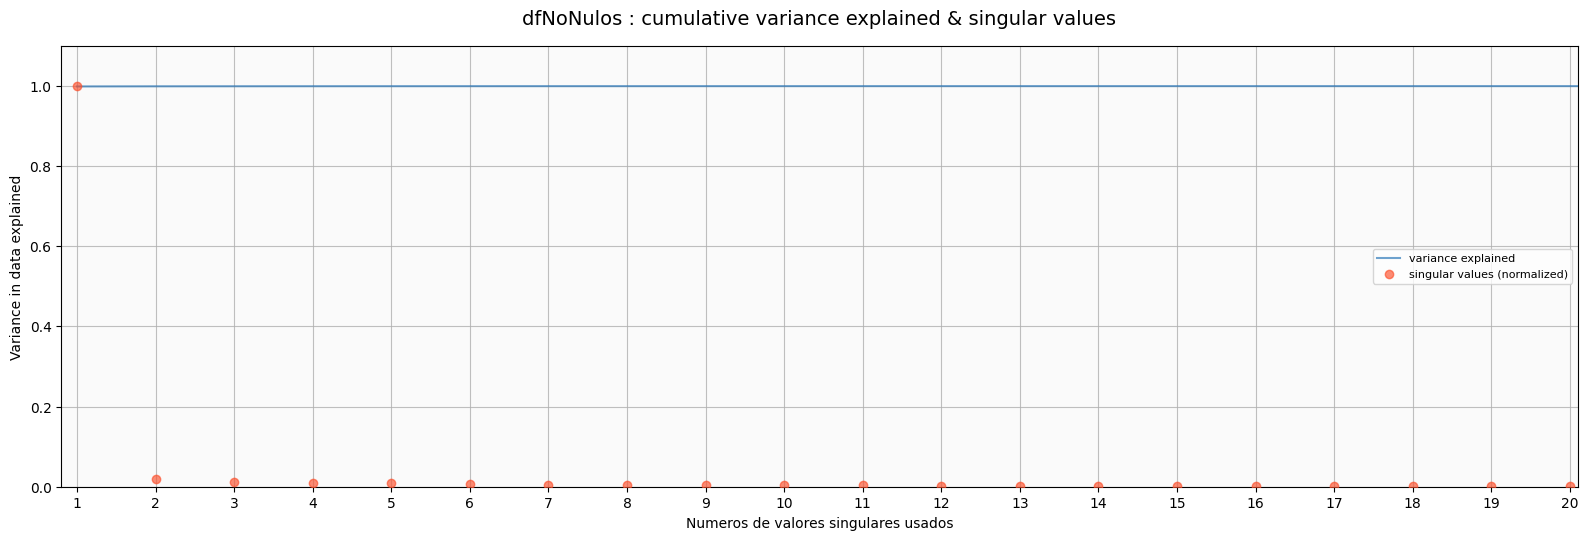

# Modelos Supervisados

## Test Train

In [98]:
df_testtrain = dfNoNulos.copy()
X = df_testtrain.drop(columns=['RainTomorrow'])
y = df_testtrain['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print("Tamaño entrenamiento:", X_train.shape[0])
print("Tamaño prueba:", X_test.shape[0])

Tamaño entrenamiento: 106644
Tamaño prueba: 35549


## Regresión logística

In [99]:
regresion_logistica = LogisticRegression(random_state=42, max_iter=1000)
regresion_logistica.fit(X_train, y_train)
y_prediccion = regresion_logistica.predict(X_test)
y_prediccion


d:\Duoc\cuartoAnio\primerSemestre\mineriadedatos\Examen\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0])

### Evaluaciones 

Matriz de Confusión
-----------------------------------------------------


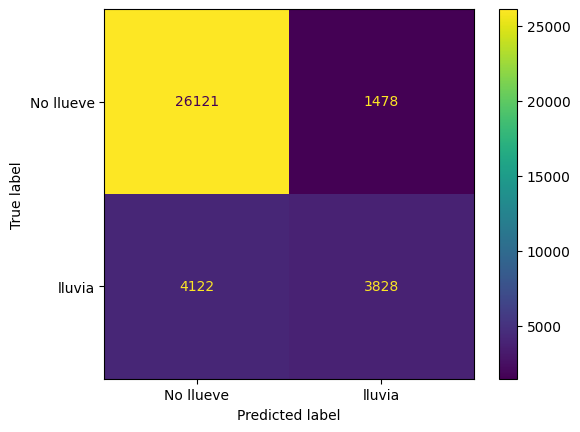

Reporte de Clasificación
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     27599
           1       0.72      0.48      0.58      7950

    accuracy                           0.84     35549
   macro avg       0.79      0.71      0.74     35549
weighted avg       0.83      0.84      0.83     35549



Curva ROC
-----------------------------------------------------


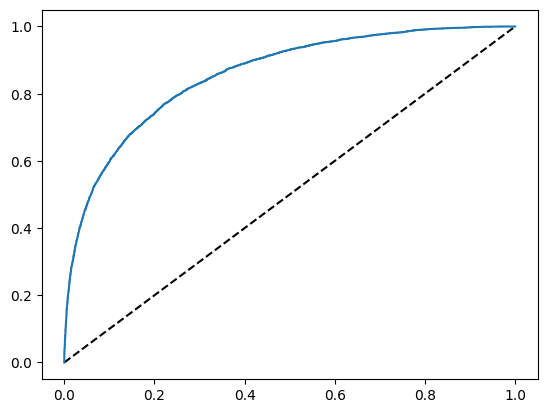

In [100]:
# Matriz de confusion
matriz_confusion = confusion_matrix(y_test, y_prediccion)
print('Matriz de Confusión') 
print('-'*53)

# Graficamos la matriz de confusion
grafico_matriz_confusion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion , display_labels = ['No llueve', 'lluvia'])
grafico_matriz_confusion.plot()
pyplot.show()
reporte_clasificacion = classification_report(y_test , y_prediccion)
print('Reporte de Clasificación') 
print('-'*53)
print(reporte_clasificacion)
print('\n')

# Curva Roc
print('Curva ROC') 
print('-'*53)
y_probabilidad_estimada = regresion_logistica.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probabilidad_estimada)
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.show()

### Precisión del modelo

In [101]:
# Puntaje curva
print("Puntaje Curva ROC:", round(roc_auc_score(y_test, y_probabilidad_estimada), 5))

# Puntaje entrenamiento
print("Puntaje Entrenamiento:", round(regresion_logistica.score(X_train, y_train), 5))
print("Puntaje Prueba:", round(regresion_logistica.score(X_test, y_test), 5))

Puntaje Curva ROC: 0.85655
Puntaje Entrenamiento: 0.84162
Puntaje Prueba: 0.84247


## Árbol de decisión

In [102]:
arbol_decision = DecisionTreeClassifier(max_depth=10, criterion='entropy',random_state=42)
arbol_decision.fit(X_train, y_train)
y_prediccion_tree = arbol_decision.predict(X_test)
y_prediccion_tree

array([0, 0, 0, ..., 0, 0, 0])

[Text(0.5595358283245679, 0.9545454545454546, 'Humidity3pm <= 66.849\nentropy = 0.768\nsamples = 106644\nvalue = [82717, 23927]\nclass = Llueve'),
 Text(0.3068181818181818, 0.8636363636363636, 'Rainfall <= 0.55\nentropy = 0.551\nsamples = 81677\nvalue = [71252.0, 10425.0]\nclass = Llueve'),
 Text(0.4331770050713749, 0.9090909090909092, 'True  '),
 Text(0.1670501502629602, 0.7727272727272727, 'WindGustSpeed <= 52.171\nentropy = 0.454\nsamples = 65917\nvalue = [59630, 6287]\nclass = Llueve'),
 Text(0.09011081893313298, 0.6818181818181818, 'Humidity3pm <= 52.809\nentropy = 0.396\nsamples = 57837\nvalue = [53305, 4532]\nclass = Llueve'),
 Text(0.046722389181066866, 0.5909090909090909, 'Sunshine <= 9.376\nentropy = 0.3\nsamples = 41145\nvalue = [38958, 2187]\nclass = Llueve'),
 Text(0.02404207362885049, 0.5, 'Pressure3pm <= 1018.425\nentropy = 0.387\nsamples = 21193\nvalue = [19585, 1608]\nclass = Llueve'),
 Text(0.012021036814425245, 0.4090909090909091, 'Humidity3pm <= 30.833\nentropy = 0.

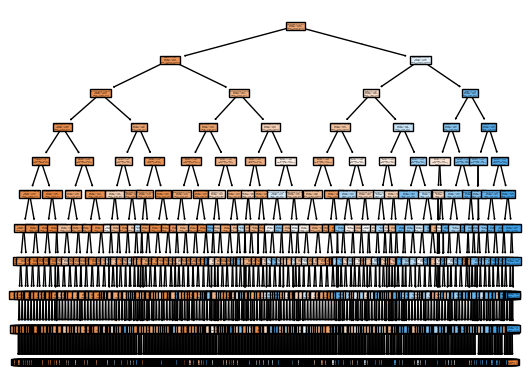

In [103]:
# plot tree
plot_tree(
    arbol_decision,
    feature_names=X.columns,
    class_names=['Llueve', 'No llueve'],
    filled=True
)

### Evaluaciones

Matriz de Confusión
-----------------------------------------------------


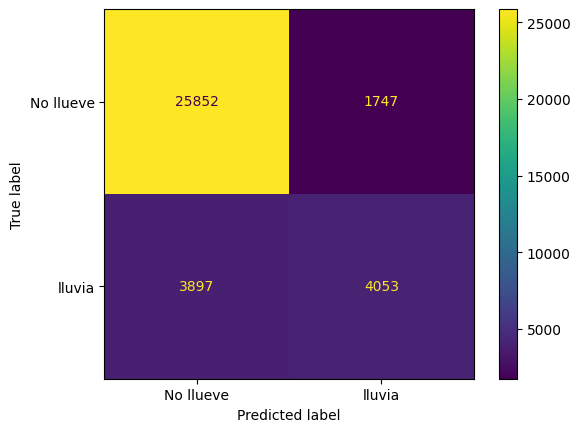

Reporte de Clasificación
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     27599
           1       0.70      0.51      0.59      7950

    accuracy                           0.84     35549
   macro avg       0.78      0.72      0.75     35549
weighted avg       0.83      0.84      0.83     35549



Curva ROC
-----------------------------------------------------


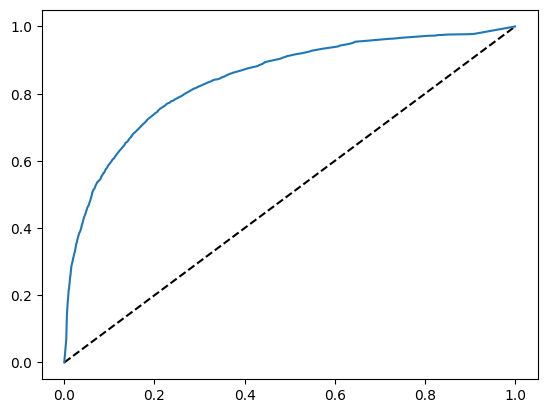

In [104]:
# Matriz de confusion
matriz_confusion = confusion_matrix(y_test, y_prediccion_tree)
print('Matriz de Confusión') 
print('-'*53)

# Graficamos la matriz de confusion
grafico_matriz_confusion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion , display_labels = ['No llueve', 'lluvia'])
grafico_matriz_confusion.plot()
pyplot.show()
reporte_clasificacion = classification_report(y_test , y_prediccion_tree)
print('Reporte de Clasificación') 
print('-'*53)
print(reporte_clasificacion)
print('\n')

# Curva Roc
print('Curva ROC') 
print('-'*53)
y_probabilidad_estimada = arbol_decision.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probabilidad_estimada)
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.show()

### Precisión del Modelo

In [105]:
# Puntaje curva
print("Puntaje Curva ROC:", round(roc_auc_score(y_test, y_probabilidad_estimada), 5))

# Puntaje entrenamiento
print("Puntaje Entrenamiento:", round(arbol_decision.score(X_train, y_train), 5))
print("Puntaje Prueba:", round(arbol_decision.score(X_test, y_test), 5))

Puntaje Curva ROC: 0.84278
Puntaje Entrenamiento: 0.85907
Puntaje Prueba: 0.84123


## Naive Bayes

In [106]:
# Ya que estamos usando datos binarios (0=No llueve,1=Lluvia)
# La mejor implementacion de naive bayes para este caso es Bernoulli

naive_bayes = BernoulliNB()
naive_bayes.fit(X_train, y_train)
y_prediccion_bayes = naive_bayes.predict(X_test)
y_prediccion_bayes

array([0, 0, 0, ..., 0, 1, 0])

### Evaluaciones

Matriz de Confusión
-----------------------------------------------------


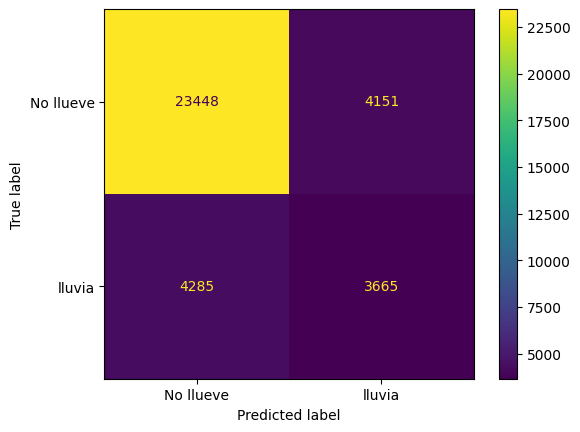

Reporte de Clasificación
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     27599
           1       0.47      0.46      0.46      7950

    accuracy                           0.76     35549
   macro avg       0.66      0.66      0.66     35549
weighted avg       0.76      0.76      0.76     35549



Curva ROC
-----------------------------------------------------


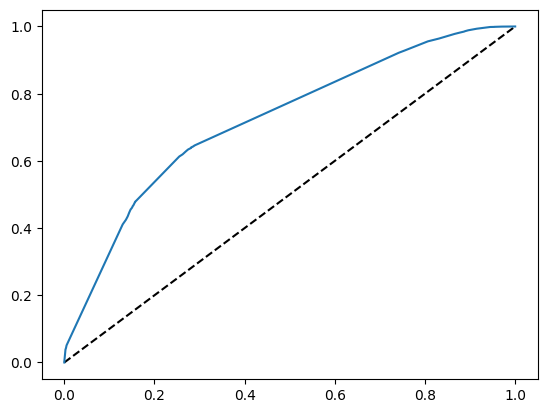

In [107]:
# Matriz de confusion
matriz_confusion = confusion_matrix(y_test, y_prediccion_bayes)
print('Matriz de Confusión') 
print('-'*53)

# Graficamos la matriz de confusion
grafico_matriz_confusion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion , display_labels = ['No llueve', 'lluvia'])
grafico_matriz_confusion.plot()
pyplot.show()
reporte_clasificacion = classification_report(y_test , y_prediccion_bayes)
print('Reporte de Clasificación') 
print('-'*53)
print(reporte_clasificacion)
print('\n')

# Curva Roc
print('Curva ROC') 
print('-'*53)
y_probabilidad_estimada = naive_bayes.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probabilidad_estimada)
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.show()

### Precisión del Modelo

In [108]:
# Puntaje curva
print("Puntaje Curva ROC:", round(roc_auc_score(y_test, y_probabilidad_estimada), 5))

# Puntaje entrenamiento
print("Puntaje Entrenamiento:", round(naive_bayes.score(X_train, y_train), 5))
print("Puntaje Prueba:", round(naive_bayes.score(X_test, y_test), 5))

Puntaje Curva ROC: 0.72233
Puntaje Entrenamiento: 0.76271
Puntaje Prueba: 0.76269


## Regresión Lineal

In [109]:
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_train, y_train)
y_prediccion_lineal = regresion_lineal.predict(X_test).astype(dtype=int)
y_prediccion_lineal

array([0, 0, 0, ..., 0, 0, 0])

### Evaluaciones

Matriz de Confusión
-----------------------------------------------------


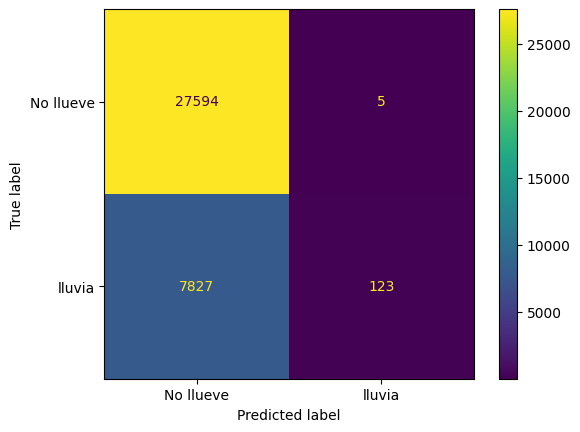

Reporte de Clasificación
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     27599
           1       0.96      0.02      0.03      7950

    accuracy                           0.78     35549
   macro avg       0.87      0.51      0.45     35549
weighted avg       0.82      0.78      0.69     35549



Curva ROC
-----------------------------------------------------


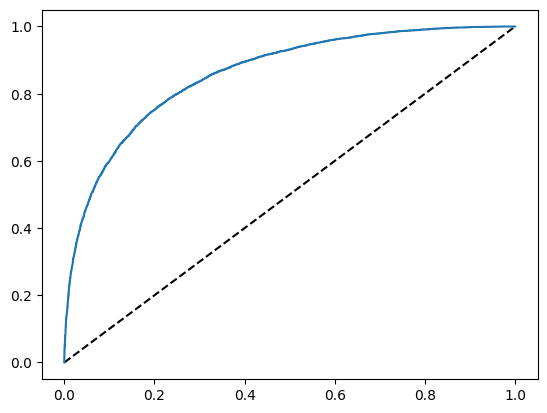

In [110]:
# Matriz de confusion
matriz_confusion = confusion_matrix(y_test, y_prediccion_lineal)
print('Matriz de Confusión') 
print('-'*53)

# Graficamos la matriz de confusion
grafico_matriz_confusion = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion , display_labels = ['No llueve', 'lluvia'])
grafico_matriz_confusion.plot()
pyplot.show()
reporte_clasificacion = classification_report(y_test , y_prediccion_lineal)
print('Reporte de Clasificación') 
print('-'*53)
print(reporte_clasificacion)
print('\n')

# Curva Roc
print('Curva ROC') 
print('-'*53)
y_probabilidad_estimada = regresion_lineal.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probabilidad_estimada)
pyplot.plot([0, 1], [0, 1], 'k--')
pyplot.plot(fpr, tpr)
pyplot.show()

### Precisión del Modelo

In [111]:
# Puntaje curva
print("Puntaje Curva ROC:", round(roc_auc_score(y_test, y_probabilidad_estimada), 5))

# Puntaje entrenamiento
print("Puntaje Entrenamiento:", round(regresion_lineal.score(X_train, y_train), 5))
print("Puntaje Prueba:", round(regresion_lineal.score(X_test, y_test), 5))

Puntaje Curva ROC: 0.85926
Puntaje Entrenamiento: 0.31429
Puntaje Prueba: 0.31526


#  Conclusiones
Podemos decir que ningun modelo puede ser efectivo bajo las condiciones que hemos dado, esto puede deberse a una basta cantidad de columnas que se asignaron en cada modelo.

Sin embargo, si tenemos que decidir por cual es el mejor modelo de los 4, podemos decir que el modelo de Regresión Logística es el mejor, ya que tiene una precisión macro de 0.80, siendo este dato el mas facil de entender.

# faltan los modelos no supervisados con los insights